In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
sns.set_context("talk")

In [6]:
def extract_quadrumers(aptamer_sequence):
    #takes in one 18-mer and return a table of quadrumers, with a position column and a quadrumer column
    quadrumers = []
    for i in np.arange(15):
        quad = aptamer_sequence[i:i+4]
        quadrumers = np.append(quadrumers,quad)
    return quadrumers

def quadrumer_with_position(aptamer_sequence):
    #return a table with position and relative quadrumer sequence for a given aptamer sequence
    quadrumers = extract_quadrumers(aptamer_sequence)
    positions = np.arange(1,16)
    return pd.DataFrame({'Position':positions,'Quadrumer':quadrumers})

def full_table_weighted(tbl):
    #takes a tbl like RnE or RnC, and returns a list of trimed sequence with weights as copy number
    #output a tbl with three columns 'Position' 'Quadrumer' and 'Weighted count'
    total_position = []
    total_quads = []
    total_weighted_count = []
    
    for i in np.arange(len(tbl)):
        temp_18mer = tbl['Trimed'][i]
        temp_rpm = tbl['RPM'][i]
        temp_df = quadrumer_with_position(temp_18mer).groupby(['Position','Quadrumer']).size().to_frame().reset_index().rename(columns={0:'count'})
        total_position = np.append(total_position,temp_df['Position'])
        total_quads = np.append(total_quads,temp_df['Quadrumer'])
        total_weighted_count = np.append(total_weighted_count, temp_df['count']*temp_rpm)
        
    return pd.DataFrame({'Position':total_position,'Quadrumer':total_quads,'Weighted Count':total_weighted_count}).astype({'Position': 'int64'})

def weighted_freq_only(full_weighted_tbl):
    #takes a full_weighted_tbl, an output from the full_table_weighted function
    #return a table with weighted frequency only. two columns: 'Quadrumer' and "Weighted frequency" (a sum!)
    return full_weighted_tbl.groupby('Quadrumer').sum().loc[:,["Weighted Count"]].rename(columns={'Weighted Count':'Weighted frequency'})

def wise_append(original_list, temp_list):
    if len(temp_list) == 0:
        return np.append(original_list, 0)
    else:
        return np.append(original_list, temp_list[0])
    
def expand_df(df):
    #takes a df with quads as index, and one R3O column and one R6O columns
    #return a expand it to R4O and R5O using the given index as reference.
    R4O_count=[]
    R5O_count=[]
    for i in df.index:
        R4O_temp = R4O_frequency.query("Quadrumer == @i")['Weighted frequency']
        R5O_temp= R5O_frequency.query("Quadrumer == @i")['Weighted frequency']
        R4O_count = wise_append(R4O_count,R4O_temp)
        R5O_count = wise_append(R5O_count,R4O_temp)    
    return pd.DataFrame({'R3O':df['R3O'],'R4O':R4O_count,'R50':R5O_count,'R6O':df['R6O'] })


In [7]:
#import Oxytocin data
R6O = pd.read_csv("Oxytocin/R6O.csv").rename(columns={'Sequence':'Trimed'})
R5O = pd.read_csv("Oxytocin/R5O.csv").rename(columns={'Sequence':'Trimed'})
R4O = pd.read_csv("Oxytocin/R4O.csv").rename(columns={'Sequence':'Trimed'})
R3O = pd.read_csv("Oxytocin/R3O.csv").rename(columns={'Sequence':'Trimed'})

R2C = pd.read_csv("Serotonin data/2RC.csv")
R3C = pd.read_csv("Serotonin data/3RC.csv")
R4C = pd.read_csv("Serotonin data/4RC.csv")
R5C = pd.read_csv("Serotonin data/5RC.csv")
R6C = pd.read_csv("Serotonin data/6RC.csv")

In [8]:
R6O.head()

,Trimed,Reads,RPM
0,CCCCCCCCCCCCCCCCCC,25,0.48
1,AGGGCCTAGGGATGACGT,12,0.23
2,GAGCAACGGGTCAGCATT,11,0.21
3,ACGGGACCGCAGATCGAG,11,0.21
4,AAGTAGGGACAGAATACG,9,0.17


In [9]:
#data processing
R6O_full_table_weighted = full_table_weighted(R6O)
R6O_frequency = weighted_freq_only(R6O_full_table_weighted)
R6C_full_table_weighted = full_table_weighted(R6C)
R6C_frequency = weighted_freq_only(R6C_full_table_weighted)
R5O_full_table_weighted = full_table_weighted(R5O)
R5O_frequency = weighted_freq_only(R5O_full_table_weighted)
R5C_full_table_weighted = full_table_weighted(R5C)
R5C_frequency = weighted_freq_only(R5C_full_table_weighted)
R4O_full_table_weighted = full_table_weighted(R4O)
R4O_frequency = weighted_freq_only(R4O_full_table_weighted)
R4C_full_table_weighted = full_table_weighted(R4C)
R4C_frequency = weighted_freq_only(R4C_full_table_weighted)
R3O_full_table_weighted = full_table_weighted(R3O)
R3O_frequency = weighted_freq_only(R3O_full_table_weighted)
R3C_full_table_weighted = full_table_weighted(R3C)
R3C_frequency = weighted_freq_only(R3C_full_table_weighted)

In [10]:
R6O_frequency.head()

,Weighted frequency
Quadrumer,
AAAA,0.74
AAAC,2.48
AAAG,3.06
AAAT,1.66
AACA,4.95


In [11]:
print('There are', len(R6O_frequency.index.unique()),'unique quadrumers in R6O')
print('There are', len(R6C_frequency.index.unique()),'unique quadrumers in R6C')

There are 256 unique quadrumers in R6O
There are 253 unique quadrumers in R6C


In [12]:
R6O_top10 = R6O_frequency.sort_values('Weighted frequency',ascending=False).head(10)
R6O_top10

,Weighted frequency
Quadrumer,
GACG,19.17
GGCA,17.20
GCAG,16.81
ACGG,16.11
GGGA,14.83
GGAC,14.67
GGAG,14.50
AGGG,14.21
GGGC,14.12


In [13]:
R6C_top10 = R6C_frequency.sort_values('Weighted frequency',ascending=False).head(10)
R6C_top10

,Weighted frequency
Quadrumer,
CGTG,832.33
ACAC,813.84
GACG,725.68
TGTG,678.46
ACGT,645.14
CGAC,620.24
GTGC,614.91
CACG,582.65
CACA,574.48


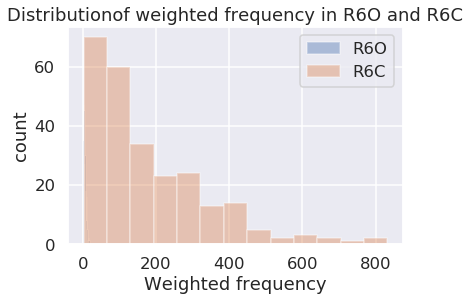

In [14]:
sns.distplot(R6O_frequency['Weighted frequency'],kde=False,label='R6O')
sns.distplot(R6C_frequency['Weighted frequency'],kde=False,label='R6C')
plt.ylabel('count')
plt.title('Distributionof weighted frequency in R6O and R6C')
plt.legend();

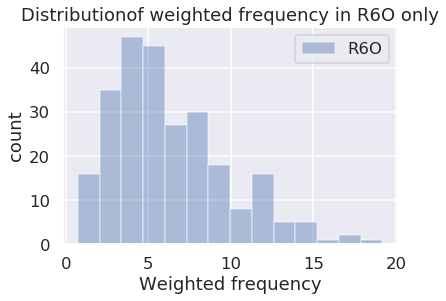

In [15]:
sns.distplot(R6O_frequency['Weighted frequency'],kde=False,label='R6O')
plt.ylabel('count')
plt.title('Distributionof weighted frequency in R6O only')
plt.legend();

## Quadrumer Position Distributions

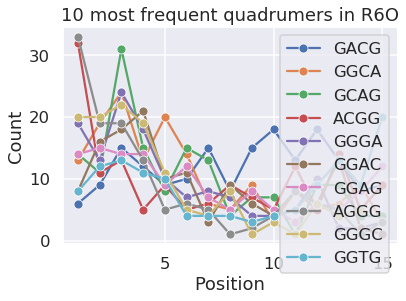

In [16]:
#position of the to 10 most frequent quadrumer in R6E
for i in R6O_top10.index:
    temp = R6O_full_table_weighted[R6O_full_table_weighted['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R6O');

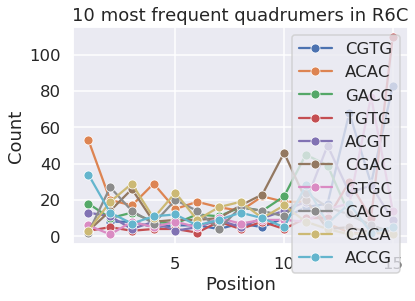

In [17]:
#position of the to 10 most frequent quadrumer in R6C
for i in R6C_top10.index:
    temp = R6C_full_table_weighted[R6C_full_table_weighted['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R6C');

In [18]:
R3O_top10 = R3O_frequency.sort_values('Weighted frequency',ascending=False).head(10)
R3C_top10 = R3C_frequency.sort_values('Weighted frequency',ascending=False).head(10)

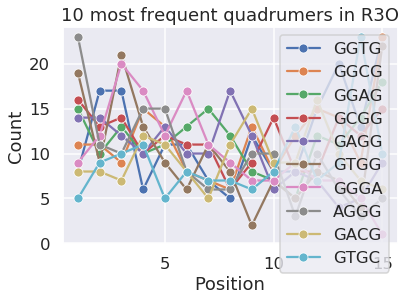

In [19]:
#position of the to 10 most frequent quadrumer in R2E
for i in R3O_top10.index:
    temp = R3O_full_table_weighted[R3O_full_table_weighted['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R3O');

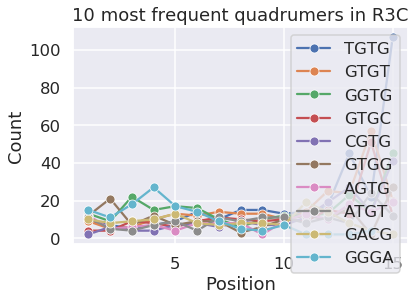

In [20]:
#position of the to 10 most frequent quadrumer in R6C
for i in R3C_top10.index:
    temp = R3C_full_table_weighted[R3C_full_table_weighted['Quadrumer']==i].loc[:,["Position","Quadrumer"]]
    temp_plot = temp['Position'].value_counts().to_frame().reset_index().rename(columns={'Position':'Count','index':'Position'})
    sns.lineplot(x='Position',y='Count',data=temp_plot, label=i, marker="o")
plt.title('10 most frequent quadrumers in R3C');

In [21]:
from scipy import stats
#percentile = stats.percentileofscore(arr, x)
temp=R6O_frequency.copy().rename(columns={'Weighted frequency':'R6O'})
temp = temp.merge(R3O_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R3O'})
R6O_dist = temp['R6O']
R3O_dist = temp['R3O']

temp['R6O percentile'] = temp['R6O'].map(lambda x:stats.percentileofscore(R6O_dist, x))
temp['R3O percentile'] = temp['R3O'].map(lambda x:stats.percentileofscore(R3O_dist, x))

In [77]:
temp.sort_values('R6O percentile',ascending=False).head(20)

,R6O,R3O,R6O percentile,R3O percentile
Quadrumer,,,,
GACG,19.17,15.42,100.000000,96.875000
GGCA,17.20,13.22,99.609375,92.968750
GCAG,16.81,14.70,99.218750,95.312500
ACGG,16.11,14.84,98.828125,95.703125
GGGA,14.83,16.47,98.437500,97.656250
GGAC,14.67,11.11,98.046875,88.281250
GGAG,14.50,19.18,97.656250,99.218750
AGGG,14.21,15.60,97.265625,97.265625
GGGC,14.12,15.02,96.875000,96.093750


In [22]:
all_quad_Oxy = expand_df(temp)

,R3O,R4O,R50,R6O
Quadrumer,,,,
AAAA,0.74,1.48,1.48,0.74
AAAC,2.58,2.42,2.42,2.48
AAAG,3.04,3.74,3.74,3.06
AAAT,1.32,2.30,2.30,1.66
AACA,3.28,4.36,4.36,4.95
...,...,...,...,...
TTGT,5.06,4.78,4.78,3.48
TTTA,2.16,1.64,1.64,1.22
TTTC,1.80,1.91,1.91,1.10


## Enrichment through each rounds

 **rich in R2E but low in R6E**

In [59]:
#parameters
low_in_R6O = np.percentile(R6O_frequency['Weighted frequency'],20) # les than 5 percentile in R6E, low in R6E
rich_in_R3O = np.percentile(R3O_frequency['Weighted frequency'],70) # more 95 percentile in R2E, rich in R2E

In [78]:
R6O_lowfreq = R6O_frequency[R6O_frequency['Weighted frequency'] < low_in_R6O].index
R3O_seq_in_R6Olow = R3O_frequency[R3O_frequency.index.isin(R6O_lowfreq)]
R3O_rich_in_R6Olow = R3O_seq_in_R6Olow[R3O_seq_in_R6Olow['Weighted frequency'] > rich_in_R3O].rename(columns={'Weighted frequency':'R3O count'}).merge(R6O_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R6O count'})
#R3O_rich_in_R6Olow_seq = R3O_rich_in_R6Olow.index

R3O_rich_in_R6Olow

,R3O count,R6O count
Quadrumer,,


In [79]:
#rich in R2E but low in R6E
R6E_lowfreq = R6E_frequency[R6E_frequency['Weighted frequency'] < low_in_R6E].index
R2E_seq_in_R6Elow = R2E_frequency[R2E_frequency.index.isin(R6E_lowfreq)]
R2E_rich_in_R6Elow = R2E_seq_in_R6Elow[R2E_seq_in_R6Elow['Weighted frequency'] > rich_in_R2E].rename(columns={'Weighted frequency':'R2E count'}).merge(R6E_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R6E count'})
R2E_rich_in_R6Elow_seq = R2E_rich_in_R6Elow.index

# R2E rich but R6E low sequences' frequencies in other rounds
R3E_count_2rich6low = []
R4E_count_2rich6low = []
R5E_count_2rich6low = []

for i in R2E_rich_in_R6Elow_seq:
    R3E_temp_2rich6low = R3E_frequency.query("Quadrumer == @i")['Weighted frequency']
    R4E_temp_2rich6low = R4E_frequency.query("Quadrumer == @i")['Weighted frequency']
    R5E_temp_2rich6low = R5E_frequency.query("Quadrumer == @i")['Weighted frequency']
    
    R3E_count_2rich6low = wise_append(R3E_count_2rich6low,R3E_temp_2rich6low)
    R4E_count_2rich6low = wise_append(R4E_count_2rich6low,R4E_temp_2rich6low)
    R5E_count_2rich6low = wise_append(R5E_count_2rich6low,R5E_temp_2rich6low)
    
R2E_rich_in_R6Elow_full = pd.DataFrame({'R2E':R2E_rich_in_R6Elow['R2E count'],
                                        'R3E':R3E_count_2rich6low,
                                        'R4E':R4E_count_2rich6low,
                                        'R5E':R5E_count_2rich6low,
                                        'R6E':R2E_rich_in_R6Elow['R6E count'],
                                       })
R2E_rich_in_R6Elow_full


NameError: name 'R6E_frequency' is not defined

In [80]:
sns.set_palette(sns.color_palette("hls", 17))
for i in R2E_rich_in_R6Elow_full.index:
    sns.lineplot(x=R2E_rich_in_R6Elow_full.loc[i].index, y=R2E_rich_in_R6Elow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Negative Enrichment through each round(rich in R2E, low in R6E)');

NameError: name 'R2E_rich_in_R6Elow_full' is not defined

**rich in R6E but low in R2E**

In [81]:
low_in_R3O = np.percentile(R3O_frequency['Weighted frequency'],20) # les than 5 percentile in R2E, low in R2E
rich_in_R6O = np.percentile(R6O_frequency['Weighted frequency'],80) # more 95 percentile in R6E, rich in R6E

In [82]:
#rich in R2E but low in R6E
R3O_lowfreq = R3O_frequency[R3O_frequency['Weighted frequency'] < low_in_R3O].index
R6O_seq_in_R3Olow = R6O_frequency[R6O_frequency.index.isin(R3O_lowfreq)]
R6O_rich_in_R3Olow = R6O_seq_in_R3Olow[R6O_seq_in_R3Olow['Weighted frequency'] > rich_in_R6O].rename(columns={'Weighted frequency':'R6O count'}).merge(R3O_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R2O count'})
R6E_rich_in_R3Olow_seq = R6O_rich_in_R3Olow.index
R6O_rich_in_R3Olow

,R6O count,R2O count
Quadrumer,,


In [83]:
#rich in R2E but low in R6E
R2E_lowfreq = R2E_frequency[R2E_frequency['Weighted frequency'] < low_in_R2E].index
R6E_seq_in_R2Elow = R6E_frequency[R6E_frequency.index.isin(R2E_lowfreq)]
R6E_rich_in_R2Elow = R6E_seq_in_R2Elow[R6E_seq_in_R2Elow['Weighted frequency'] > rich_in_R6E].rename(columns={'Weighted frequency':'R6E count'}).merge(R2E_frequency,on='Quadrumer').rename(columns={'Weighted frequency':'R2E count'})
R6E_rich_in_R2Elow_seq = R6E_rich_in_R2Elow.index


# R2E rich but R6E low sequences' frequencies in other rounds
R3E_count_6rich2low = []
R4E_count_6rich2low = []
R5E_count_6rich2low = []

for i in R6E_rich_in_R2Elow_seq:
    R3E_temp_6rich2low = R3E_frequency.query("Quadrumer == @i")['Weighted frequency']
    R4E_temp_6rich2low = R4E_frequency.query("Quadrumer == @i")['Weighted frequency']
    R5E_temp_6rich2low = R5E_frequency.query("Quadrumer == @i")['Weighted frequency']
    
    R3E_count_6rich2low = wise_append(R3E_count_6rich2low,R3E_temp_6rich2low)
    R4E_count_6rich2low = wise_append(R4E_count_6rich2low,R4E_temp_6rich2low)
    R5E_count_6rich2low = wise_append(R5E_count_6rich2low,R5E_temp_6rich2low)
    
R6E_rich_in_R2Elow_full = pd.DataFrame({'R2E':R6E_rich_in_R2Elow['R2E count'],
                                        'R3E':R3E_count_6rich2low,
                                        'R4E':R4E_count_6rich2low,
                                        'R5E':R5E_count_6rich2low,
                                        'R6E':R6E_rich_in_R2Elow['R6E count'],
                                       })
R6E_rich_in_R2Elow_full

NameError: name 'R2E_frequency' is not defined

In [84]:
for i in R6E_rich_in_R2Elow_full.index:
    sns.lineplot(x=R6E_rich_in_R2Elow_full.loc[i].index, y=R6E_rich_in_R2Elow_full.loc[i].values, label=i)
plt.xlabel('Rounds')
plt.ylabel('Count')
plt.title('Positive Enrichment through each round');

NameError: name 'R6E_rich_in_R2Elow_full' is not defined